### Loading the packages and dataset

In [1]:
import pandas as pd
import numpy as np
import math
from random import sample
import random
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from dtw import *
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy import stats
from scipy.cluster.hierarchy import fcluster, ward
import datetime
from datetime import datetime

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
train = pd.read_csv("../data/train.csv")
calendar = pd.read_csv("../data/calendar.csv")
prices = pd.read_csv("../data/prices.csv")

### Exploratory Data Analysis

In [3]:
#previewing the training dataset
train.head()

,id,item_id,subcat_id,category_id,store_id,region_id,d_1,d_2,d_3,d_4,...,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919
0,Beauty_1_001_East_1,Beauty_1_001,Beauty_1,Beauty,East_1,East,0,0,0,0,...,3,0,1,1,0,0,0,2,0,3
1,Beauty_1_002_East_1,Beauty_1_002,Beauty_1,Beauty,East_1,East,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Beauty_1_003_East_1,Beauty_1_003,Beauty_1,Beauty,East_1,East,0,0,0,0,...,0,1,1,1,0,0,1,1,0,2
3,Beauty_1_004_East_1,Beauty_1_004,Beauty_1,Beauty,East_1,East,0,0,0,0,...,1,3,7,2,0,0,1,2,4,1
4,Beauty_1_005_East_1,Beauty_1_005,Beauty_1,Beauty,East_1,East,0,0,0,0,...,2,2,2,4,1,0,2,3,1,0


In [4]:
#determining the number of unique id's 
train['id'].unique().shape[0] == train.shape[0] #true

train.shape[0]

30490

In [5]:
#number of unique item id's
unique_item_id = train['item_id'].unique().shape[0]
print(unique_item_id)

#number of unique subcategory id's
unique_subcat_id = train['subcat_id'].unique().shape[0]
print(unique_subcat_id)

#number of unique category id's
unique_cat_id = train['category_id'].unique().shape[0]
print(unique_cat_id)

#number of store category id's
unique_store_id = train['store_id'].unique().shape[0]
print(unique_store_id)

3049
7
3
10


In [6]:
#checking for null values
nulls = train.isnull().sum()
nulls

id             0
item_id        0
subcat_id      0
category_id    0
store_id       0
              ..
d_1915         0
d_1916         0
d_1917         0
d_1918         0
d_1919         0
Length: 1925, dtype: int64

In [7]:
nulls.sum()

0

In [8]:
#determining the number of ids for each item_id
item_ids = train['item_id'].unique()
for i in item_ids:
    num = len(train[train['item_id'] == i])
    print('There are {0} ids with item_id {1}'.format(num, i))

There are 10 ids with item_id Beauty_1_001
There are 10 ids with item_id Beauty_1_002
There are 10 ids with item_id Beauty_1_003
There are 10 ids with item_id Beauty_1_004
There are 10 ids with item_id Beauty_1_005
There are 10 ids with item_id Beauty_1_006
There are 10 ids with item_id Beauty_1_007
There are 10 ids with item_id Beauty_1_008
There are 10 ids with item_id Beauty_1_009
There are 10 ids with item_id Beauty_1_010
There are 10 ids with item_id Beauty_1_011
There are 10 ids with item_id Beauty_1_012
There are 10 ids with item_id Beauty_1_013
There are 10 ids with item_id Beauty_1_014
There are 10 ids with item_id Beauty_1_015
There are 10 ids with item_id Beauty_1_016
There are 10 ids with item_id Beauty_1_017
There are 10 ids with item_id Beauty_1_018
There are 10 ids with item_id Beauty_1_019
There are 10 ids with item_id Beauty_1_020
There are 10 ids with item_id Beauty_1_021
There are 10 ids with item_id Beauty_1_022
There are 10 ids with item_id Beauty_1_023
There are 1

There are 10 ids with item_id Beauty_1_264
There are 10 ids with item_id Beauty_1_265
There are 10 ids with item_id Beauty_1_266
There are 10 ids with item_id Beauty_1_267
There are 10 ids with item_id Beauty_1_268
There are 10 ids with item_id Beauty_1_269
There are 10 ids with item_id Beauty_1_270
There are 10 ids with item_id Beauty_1_271
There are 10 ids with item_id Beauty_1_272
There are 10 ids with item_id Beauty_1_273
There are 10 ids with item_id Beauty_1_274
There are 10 ids with item_id Beauty_1_275
There are 10 ids with item_id Beauty_1_276
There are 10 ids with item_id Beauty_1_277
There are 10 ids with item_id Beauty_1_278
There are 10 ids with item_id Beauty_1_279
There are 10 ids with item_id Beauty_1_280
There are 10 ids with item_id Beauty_1_281
There are 10 ids with item_id Beauty_1_282
There are 10 ids with item_id Beauty_1_283
There are 10 ids with item_id Beauty_1_284
There are 10 ids with item_id Beauty_1_285
There are 10 ids with item_id Beauty_1_286
There are 1

There are 10 ids with item_id Beauty_2_106
There are 10 ids with item_id Beauty_2_107
There are 10 ids with item_id Beauty_2_108
There are 10 ids with item_id Beauty_2_109
There are 10 ids with item_id Beauty_2_110
There are 10 ids with item_id Beauty_2_111
There are 10 ids with item_id Beauty_2_112
There are 10 ids with item_id Beauty_2_113
There are 10 ids with item_id Beauty_2_114
There are 10 ids with item_id Beauty_2_115
There are 10 ids with item_id Beauty_2_116
There are 10 ids with item_id Beauty_2_117
There are 10 ids with item_id Beauty_2_118
There are 10 ids with item_id Beauty_2_119
There are 10 ids with item_id Beauty_2_120
There are 10 ids with item_id Beauty_2_121
There are 10 ids with item_id Beauty_2_122
There are 10 ids with item_id Beauty_2_123
There are 10 ids with item_id Beauty_2_124
There are 10 ids with item_id Beauty_2_125
There are 10 ids with item_id Beauty_2_126
There are 10 ids with item_id Beauty_2_127
There are 10 ids with item_id Beauty_2_128
There are 1

There are 10 ids with item_id Cleaning_1_224
There are 10 ids with item_id Cleaning_1_225
There are 10 ids with item_id Cleaning_1_226
There are 10 ids with item_id Cleaning_1_227
There are 10 ids with item_id Cleaning_1_228
There are 10 ids with item_id Cleaning_1_229
There are 10 ids with item_id Cleaning_1_230
There are 10 ids with item_id Cleaning_1_231
There are 10 ids with item_id Cleaning_1_232
There are 10 ids with item_id Cleaning_1_233
There are 10 ids with item_id Cleaning_1_234
There are 10 ids with item_id Cleaning_1_235
There are 10 ids with item_id Cleaning_1_236
There are 10 ids with item_id Cleaning_1_237
There are 10 ids with item_id Cleaning_1_238
There are 10 ids with item_id Cleaning_1_239
There are 10 ids with item_id Cleaning_1_241
There are 10 ids with item_id Cleaning_1_242
There are 10 ids with item_id Cleaning_1_243
There are 10 ids with item_id Cleaning_1_244
There are 10 ids with item_id Cleaning_1_245
There are 10 ids with item_id Cleaning_1_246
There are 

There are 10 ids with item_id Cleaning_1_417
There are 10 ids with item_id Cleaning_1_418
There are 10 ids with item_id Cleaning_1_419
There are 10 ids with item_id Cleaning_1_420
There are 10 ids with item_id Cleaning_1_421
There are 10 ids with item_id Cleaning_1_422
There are 10 ids with item_id Cleaning_1_423
There are 10 ids with item_id Cleaning_1_424
There are 10 ids with item_id Cleaning_1_425
There are 10 ids with item_id Cleaning_1_426
There are 10 ids with item_id Cleaning_1_427
There are 10 ids with item_id Cleaning_1_428
There are 10 ids with item_id Cleaning_1_429
There are 10 ids with item_id Cleaning_1_430
There are 10 ids with item_id Cleaning_1_431
There are 10 ids with item_id Cleaning_1_432
There are 10 ids with item_id Cleaning_1_433
There are 10 ids with item_id Cleaning_1_434
There are 10 ids with item_id Cleaning_1_435
There are 10 ids with item_id Cleaning_1_436
There are 10 ids with item_id Cleaning_1_437
There are 10 ids with item_id Cleaning_1_438
There are 

There are 10 ids with item_id Cleaning_2_141
There are 10 ids with item_id Cleaning_2_142
There are 10 ids with item_id Cleaning_2_143
There are 10 ids with item_id Cleaning_2_144
There are 10 ids with item_id Cleaning_2_145
There are 10 ids with item_id Cleaning_2_146
There are 10 ids with item_id Cleaning_2_147
There are 10 ids with item_id Cleaning_2_148
There are 10 ids with item_id Cleaning_2_149
There are 10 ids with item_id Cleaning_2_150
There are 10 ids with item_id Cleaning_2_151
There are 10 ids with item_id Cleaning_2_152
There are 10 ids with item_id Cleaning_2_153
There are 10 ids with item_id Cleaning_2_154
There are 10 ids with item_id Cleaning_2_155
There are 10 ids with item_id Cleaning_2_156
There are 10 ids with item_id Cleaning_2_157
There are 10 ids with item_id Cleaning_2_158
There are 10 ids with item_id Cleaning_2_159
There are 10 ids with item_id Cleaning_2_160
There are 10 ids with item_id Cleaning_2_161
There are 10 ids with item_id Cleaning_2_162
There are 

There are 10 ids with item_id Cleaning_2_395
There are 10 ids with item_id Cleaning_2_396
There are 10 ids with item_id Cleaning_2_397
There are 10 ids with item_id Cleaning_2_398
There are 10 ids with item_id Cleaning_2_399
There are 10 ids with item_id Cleaning_2_400
There are 10 ids with item_id Cleaning_2_401
There are 10 ids with item_id Cleaning_2_402
There are 10 ids with item_id Cleaning_2_403
There are 10 ids with item_id Cleaning_2_404
There are 10 ids with item_id Cleaning_2_405
There are 10 ids with item_id Cleaning_2_406
There are 10 ids with item_id Cleaning_2_407
There are 10 ids with item_id Cleaning_2_408
There are 10 ids with item_id Cleaning_2_409
There are 10 ids with item_id Cleaning_2_410
There are 10 ids with item_id Cleaning_2_411
There are 10 ids with item_id Cleaning_2_412
There are 10 ids with item_id Cleaning_2_413
There are 10 ids with item_id Cleaning_2_414
There are 10 ids with item_id Cleaning_2_415
There are 10 ids with item_id Cleaning_2_416
There are 

There are 10 ids with item_id Food_1_143
There are 10 ids with item_id Food_1_144
There are 10 ids with item_id Food_1_145
There are 10 ids with item_id Food_1_146
There are 10 ids with item_id Food_1_147
There are 10 ids with item_id Food_1_148
There are 10 ids with item_id Food_1_149
There are 10 ids with item_id Food_1_150
There are 10 ids with item_id Food_1_151
There are 10 ids with item_id Food_1_152
There are 10 ids with item_id Food_1_153
There are 10 ids with item_id Food_1_154
There are 10 ids with item_id Food_1_155
There are 10 ids with item_id Food_1_156
There are 10 ids with item_id Food_1_157
There are 10 ids with item_id Food_1_158
There are 10 ids with item_id Food_1_159
There are 10 ids with item_id Food_1_160
There are 10 ids with item_id Food_1_161
There are 10 ids with item_id Food_1_162
There are 10 ids with item_id Food_1_163
There are 10 ids with item_id Food_1_164
There are 10 ids with item_id Food_1_166
There are 10 ids with item_id Food_1_167
There are 10 ids

There are 10 ids with item_id Food_2_149
There are 10 ids with item_id Food_2_150
There are 10 ids with item_id Food_2_151
There are 10 ids with item_id Food_2_152
There are 10 ids with item_id Food_2_153
There are 10 ids with item_id Food_2_154
There are 10 ids with item_id Food_2_155
There are 10 ids with item_id Food_2_156
There are 10 ids with item_id Food_2_157
There are 10 ids with item_id Food_2_158
There are 10 ids with item_id Food_2_159
There are 10 ids with item_id Food_2_160
There are 10 ids with item_id Food_2_161
There are 10 ids with item_id Food_2_162
There are 10 ids with item_id Food_2_163
There are 10 ids with item_id Food_2_164
There are 10 ids with item_id Food_2_165
There are 10 ids with item_id Food_2_166
There are 10 ids with item_id Food_2_167
There are 10 ids with item_id Food_2_168
There are 10 ids with item_id Food_2_169
There are 10 ids with item_id Food_2_170
There are 10 ids with item_id Food_2_171
There are 10 ids with item_id Food_2_172
There are 10 ids

There are 10 ids with item_id Food_3_001
There are 10 ids with item_id Food_3_002
There are 10 ids with item_id Food_3_003
There are 10 ids with item_id Food_3_004
There are 10 ids with item_id Food_3_005
There are 10 ids with item_id Food_3_006
There are 10 ids with item_id Food_3_007
There are 10 ids with item_id Food_3_008
There are 10 ids with item_id Food_3_009
There are 10 ids with item_id Food_3_010
There are 10 ids with item_id Food_3_011
There are 10 ids with item_id Food_3_012
There are 10 ids with item_id Food_3_013
There are 10 ids with item_id Food_3_014
There are 10 ids with item_id Food_3_015
There are 10 ids with item_id Food_3_016
There are 10 ids with item_id Food_3_017
There are 10 ids with item_id Food_3_018
There are 10 ids with item_id Food_3_019
There are 10 ids with item_id Food_3_020
There are 10 ids with item_id Food_3_021
There are 10 ids with item_id Food_3_022
There are 10 ids with item_id Food_3_023
There are 10 ids with item_id Food_3_024
There are 10 ids

There are 10 ids with item_id Food_3_255
There are 10 ids with item_id Food_3_256
There are 10 ids with item_id Food_3_257
There are 10 ids with item_id Food_3_258
There are 10 ids with item_id Food_3_259
There are 10 ids with item_id Food_3_260
There are 10 ids with item_id Food_3_261
There are 10 ids with item_id Food_3_262
There are 10 ids with item_id Food_3_263
There are 10 ids with item_id Food_3_264
There are 10 ids with item_id Food_3_265
There are 10 ids with item_id Food_3_266
There are 10 ids with item_id Food_3_267
There are 10 ids with item_id Food_3_268
There are 10 ids with item_id Food_3_269
There are 10 ids with item_id Food_3_270
There are 10 ids with item_id Food_3_271
There are 10 ids with item_id Food_3_272
There are 10 ids with item_id Food_3_273
There are 10 ids with item_id Food_3_274
There are 10 ids with item_id Food_3_275
There are 10 ids with item_id Food_3_276
There are 10 ids with item_id Food_3_277
There are 10 ids with item_id Food_3_278
There are 10 ids

There are 10 ids with item_id Food_3_525
There are 10 ids with item_id Food_3_526
There are 10 ids with item_id Food_3_527
There are 10 ids with item_id Food_3_528
There are 10 ids with item_id Food_3_529
There are 10 ids with item_id Food_3_530
There are 10 ids with item_id Food_3_531
There are 10 ids with item_id Food_3_532
There are 10 ids with item_id Food_3_533
There are 10 ids with item_id Food_3_534
There are 10 ids with item_id Food_3_535
There are 10 ids with item_id Food_3_536
There are 10 ids with item_id Food_3_537
There are 10 ids with item_id Food_3_538
There are 10 ids with item_id Food_3_539
There are 10 ids with item_id Food_3_540
There are 10 ids with item_id Food_3_541
There are 10 ids with item_id Food_3_542
There are 10 ids with item_id Food_3_543
There are 10 ids with item_id Food_3_544
There are 10 ids with item_id Food_3_545
There are 10 ids with item_id Food_3_546
There are 10 ids with item_id Food_3_547
There are 10 ids with item_id Food_3_548
There are 10 ids

There are 10 ids with item_id Food_3_798
There are 10 ids with item_id Food_3_799
There are 10 ids with item_id Food_3_800
There are 10 ids with item_id Food_3_801
There are 10 ids with item_id Food_3_802
There are 10 ids with item_id Food_3_803
There are 10 ids with item_id Food_3_804
There are 10 ids with item_id Food_3_805
There are 10 ids with item_id Food_3_806
There are 10 ids with item_id Food_3_807
There are 10 ids with item_id Food_3_808
There are 10 ids with item_id Food_3_809
There are 10 ids with item_id Food_3_810
There are 10 ids with item_id Food_3_811
There are 10 ids with item_id Food_3_812
There are 10 ids with item_id Food_3_813
There are 10 ids with item_id Food_3_814
There are 10 ids with item_id Food_3_815
There are 10 ids with item_id Food_3_816
There are 10 ids with item_id Food_3_817
There are 10 ids with item_id Food_3_818
There are 10 ids with item_id Food_3_819
There are 10 ids with item_id Food_3_820
There are 10 ids with item_id Food_3_821
There are 10 ids

In [9]:
#determining the number of ids for each subcat_id
subcat_ids = train['subcat_id'].unique()
for i in subcat_ids:
    num = len(train[train['subcat_id'] == i])
    print('There are {0} ids with subcat_id {1}'.format(num, i))

There are 4160 ids with subcat_id Beauty_1
There are 1490 ids with subcat_id Beauty_2
There are 5320 ids with subcat_id Cleaning_1
There are 5150 ids with subcat_id Cleaning_2
There are 2160 ids with subcat_id Food_1
There are 3980 ids with subcat_id Food_2
There are 8230 ids with subcat_id Food_3


In [10]:
#determining the number of ids for each category_id
category_ids = train['category_id'].unique()
for i in category_ids:
    num = len(train[train['category_id'] == i])
    print('There are {0} ids with cateogory_id {1}'.format(num, i))

There are 5650 ids with cateogory_id Beauty
There are 10470 ids with cateogory_id Cleaning
There are 14370 ids with cateogory_id Food


### Visualization
Source for the visualization and DTW part was inspired from the code in the following link: https://www.kaggle.com/code/timib1203/time-series-clustering-for-forecasting-preparation/notebook#Dynamic-Time-Warping

The purpose of this section is to visualize our data and get a better idea of how sales looks like for each unique id, item_id, and subcat_id. 

In [11]:
def series_from_id(_id:str) -> pd.DataFrame:
    """
    Get a daily time series for a single id
    """
    return train.loc[train.id == _id]\
    .iloc[:,6:]\
    .T

#function to easily access series by item
def series_from_item(item:str) -> pd.DataFrame:
    return daily_item_lookup.loc[item]

#function to easily access series by subcategory
def series_from_subcat(subcat:str) -> pd.DataFrame:
    return daily_subcat_lookup.loc[subcat]

#time series for id in a binned sales, specifically binned weekly
def series_from_id_binned(_id:str, bin_every:int = 7) -> pd.DataFrame:
    """
    Get the sales for an id, grouped by a fixed interval (default 7 - weekly)
    """
    t = series_from_id(_id).reset_index()
    t['index'] = t.index.map(lambda x: x - (x % bin_every))
    t.columns = pd.Index(["day", "sales"])
    return t.groupby("day")\
        .agg({"sales":"sum"})

#time series for item_id in a binned sales, specifically binned weekly
def series_from_item_binned(item:str, bin_every:int = 7) -> pd.DataFrame:
    """
    Get the sales for an id, grouped by a fixed interval (default 7 - weekly)
    """
    t = series_from_item(item).reset_index()
    t["variable"] = t.index.map(lambda x: x - (x % bin_every))
    return t.groupby("variable")\
        .agg({"value":"sum"})

#series_from_item_binned("Beauty_1_001")

#time series for subcategory in a binned sales, specifically binned weekly
def series_from_subcat_binned(subcat:str, bin_every:int = 7) -> pd.DataFrame:
    """
    Get the sales for a department, grouped by a fixed interval (default 7 - weekly)
    """
    t = series_from_subcat(subcat).reset_index()
    t["variable"] = t.index.map(lambda x: x - (x % bin_every))
    return t.groupby("variable")\
        .agg({"value":"sum"})


In [12]:
#deleting the 'd' in the column titles 
_cols = list(train.columns)

train.columns = pd.Index(_cols[:6] + [int(c.replace("d_","")) for c in _cols[6:]])

In [13]:
#global lookup table by item
daily_item_lookup = train[["item_id"] + list(train.columns[6:])]\
    .melt(id_vars = "item_id")\
    .groupby("item_id variable".split())\
    .agg({"value":"sum"})

In [14]:
#global lookup table by subcategory
daily_subcat_lookup = train[["subcat_id"] + list(train.columns[6:])]\
    .melt(id_vars = "subcat_id")\
    .groupby("subcat_id variable".split())\
    .agg({"value":"sum"})

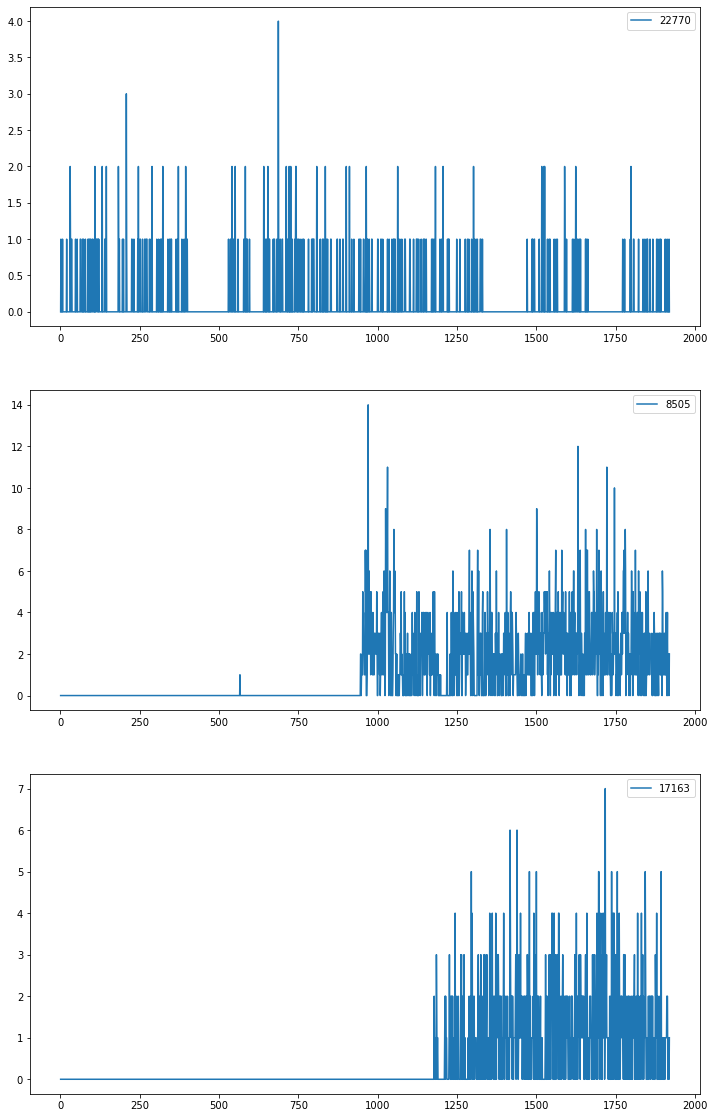

In [15]:
#plotting 5 random id's
fig, axes = plt.subplots(nrows = 3, figsize = (12,20))
random_ids = train["id"].sample(n = 3, random_state = 1)
for i in range(len(random_ids)):
    series_from_id(random_ids.iloc[i]).plot(ax = axes[i])

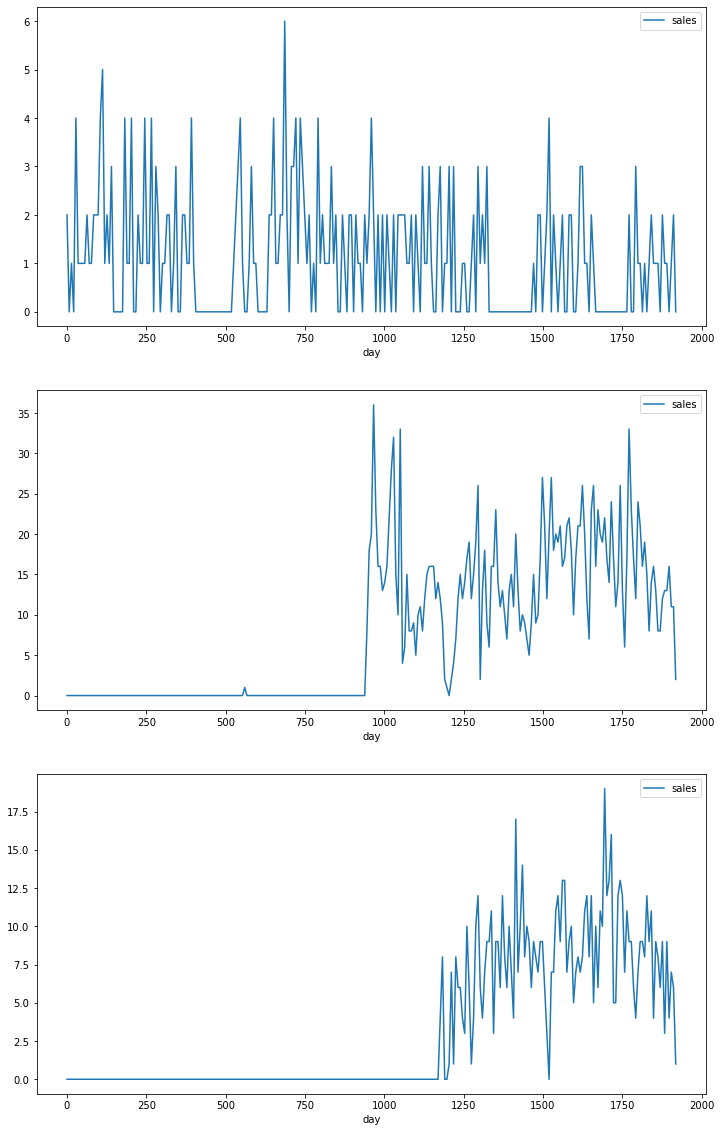

In [16]:
#since daily is sporatic and there is less of a clear pattern, let's plot it after binning the id's weekly
fig, axes = plt.subplots(nrows = 3, figsize = (12,20))
random_ids = train["id"].sample(n = 3, random_state = 1)
for i in range(len(random_ids)):
    series_from_id_binned(random_ids.iloc[i], bin_every = 7).plot(ax = axes[i])

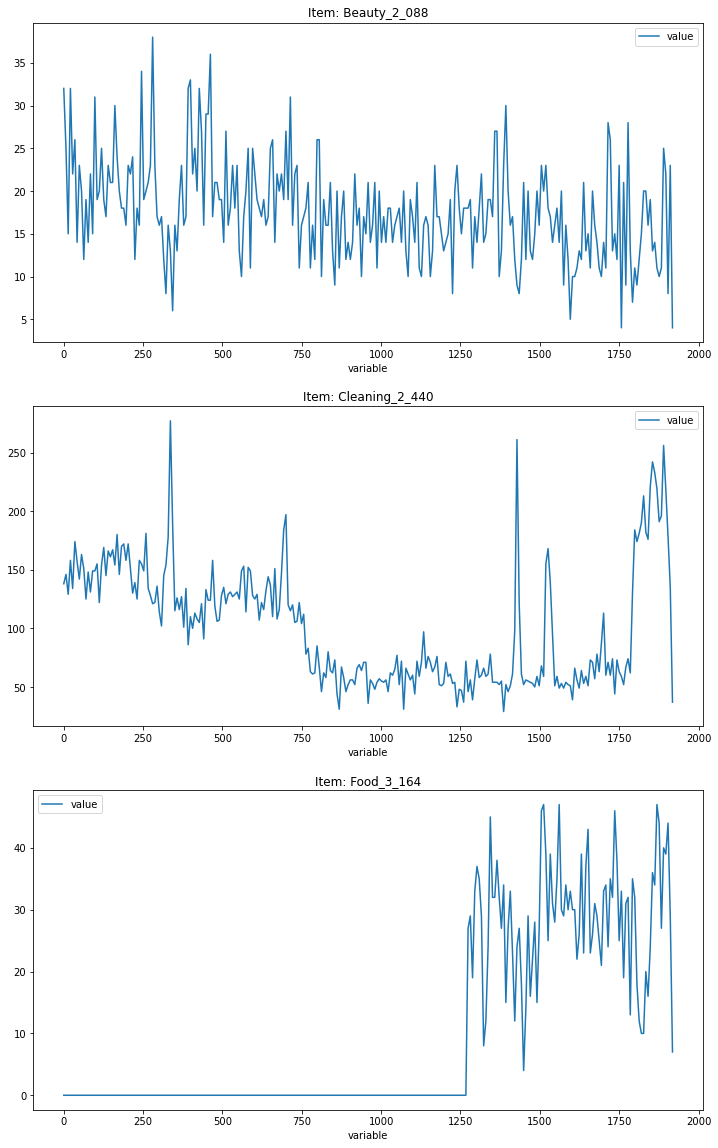

In [17]:
#plotting binned item_id's; the bin is weekly
fig, axes = plt.subplots(nrows = 3, figsize = (12,20))
random_id = sample(list(train["item_id"].unique()), 3)
for i in range(len(random_id)):
    series_from_item_binned(random_id[i], bin_every = 7).plot(ax = axes[i])
    axes[i].set_title("Item: %s" % random_id[i])

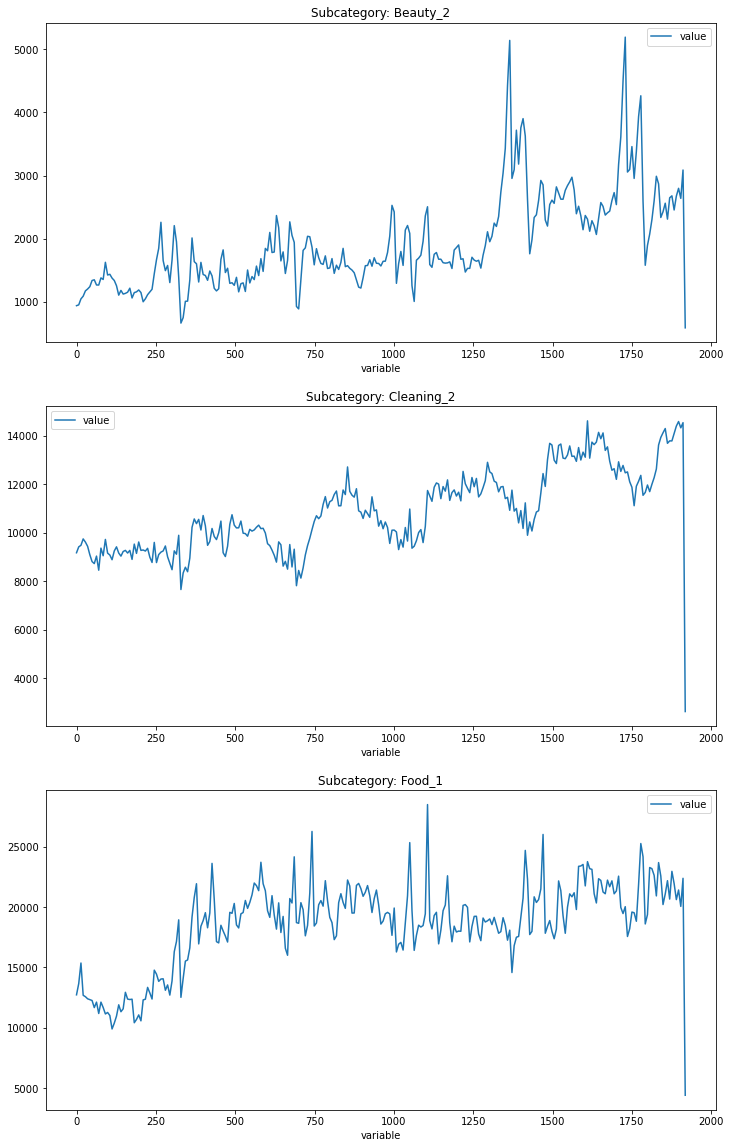

In [18]:
#plotting binned subcat_id; the bin is weekly
fig, axes = plt.subplots(nrows = 3, figsize = (12,20))
random_id = sample(list(train["subcat_id"].unique()), 3)
for i in range(len(random_id)):
    series_from_subcat_binned(random_id[i], bin_every = 7).plot(ax = axes[i])
    axes[i].set_title("Subcategory: %s" % random_id[i])

## DTW
Next we're trying to get the clusters for each id by creating clusters based on a combination of store_id and subcategory_id. This eventually results in 22 clusters.

In [19]:
#global lookup table by combination of subcategory_id and store_id
daily_subcat_store_lookup = train[["subcat_id", "store_id"] + list(train.columns[6:])]\
    .melt(id_vars = ["subcat_id", "store_id"])\
    .groupby(["subcat_id", "store_id", "variable"])\
    .agg({"value":"sum"})

In [20]:
#binning it into weeks
subcat_store_weekly = daily_subcat_store_lookup.copy().reset_index()
subcat_store_weekly['variable'] = subcat_store_weekly['variable'].map(lambda x: x - (x%7))
subcat_store_weekly = subcat_store_weekly.groupby(["subcat_id", "store_id", "variable"]).mean()

#pivoting the table
subcat_store_weekly = subcat_store_weekly.pivot_table(index = 'variable', columns=["subcat_id", "store_id"], values = "value").copy()

#flatten the multi-index table
subcat_store_weekly.columns = subcat_store_weekly.columns.to_flat_index()


In [21]:
def get_dtw_diff_matrix(cols:list):
    """
    From a list of series, compute a distance matrix by computing the 
    DTW distance of all pairwise combinations of series.
    """
    diff_matrix = {}

    cross = itertools.product(cols, cols)
    for (col1, col2) in cross:
        series1 = subcat_store_weekly[col1]
        series2 = subcat_store_weekly[col2]
        diff = dtw(
            series1, 
            series2,
            keep_internals=True, 
            step_pattern=rabinerJuangStepPattern(2, "c")
            )\
            .normalizedDistance
        diff_matrix[(col1, col2)] = [diff]
    return diff_matrix

In [22]:
dtw_diff_dict = get_dtw_diff_matrix(list(subcat_store_weekly.columns))
# make into a df
dtw_diff_df = pd.DataFrame(dtw_diff_dict).T.reset_index()\
    .rename(columns = {"level_0":"item1", "level_1":"item2", 0:"diff"})\
    .pivot_table(index = "item1", columns = "item2", values = "diff")

In [23]:
# ward clustering from difference matrix, where distance is dynamic time warping distance instead of euclidean
t = ward(dtw_diff_df)
# extract clusters into a df
dtw_clusters = pd.DataFrame({"cluster":fcluster(t, 1.15)}, index = dtw_diff_df.index)

In [24]:
#temp is an edited version of dtw_clusters df so it has a column of the subcat and a column of the store
temp = dtw_clusters.copy()
temp["subcat_id"] = ""
temp["store_id"] = ""

temp.head()

,cluster,subcat_id,store_id
item1,,,
"(Beauty_1, Central_1)",6,,
"(Beauty_1, Central_2)",14,,
"(Beauty_1, Central_3)",4,,
"(Beauty_1, East_1)",16,,
"(Beauty_1, East_2)",14,,


In [25]:
#storing the subcat_id and store_id from the clusters in different columns
indices = temp.index
for i in range(len(indices)):
    subcat, store = temp.index[i][0], temp.index[i][1]
    temp['subcat_id'][i] = subcat
    temp['store_id'][i] = store

/var/folders/jl/616bs5q50511nf0xb1y79__00000gn/T/ipykernel_60311/1205481060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['subcat_id'][i] = subcat
/var/folders/jl/616bs5q50511nf0xb1y79__00000gn/T/ipykernel_60311/1205481060.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['store_id'][i] = store


In [26]:
temp.head()

,cluster,subcat_id,store_id
item1,,,
"(Beauty_1, Central_1)",6,Beauty_1,Central_1
"(Beauty_1, Central_2)",14,Beauty_1,Central_2
"(Beauty_1, Central_3)",4,Beauty_1,Central_3
"(Beauty_1, East_1)",16,Beauty_1,East_1
"(Beauty_1, East_2)",14,Beauty_1,East_2


/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


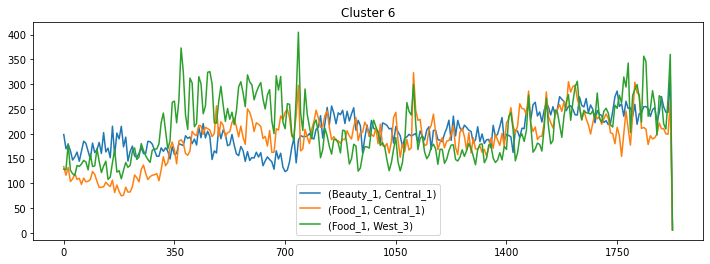

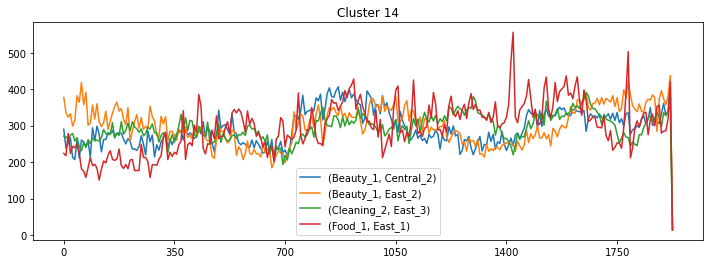

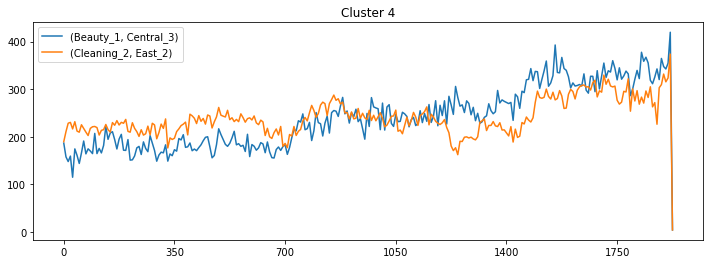

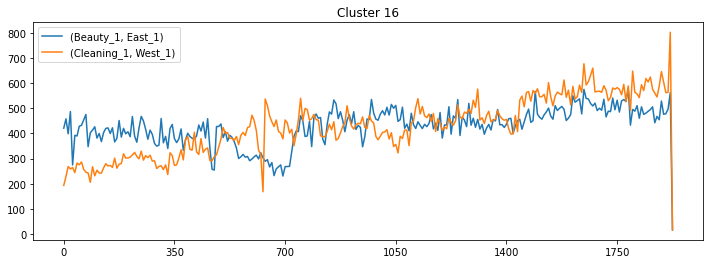

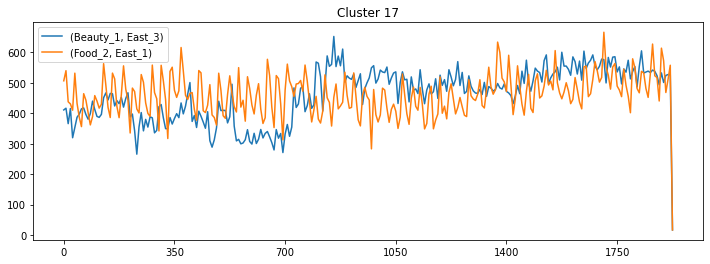

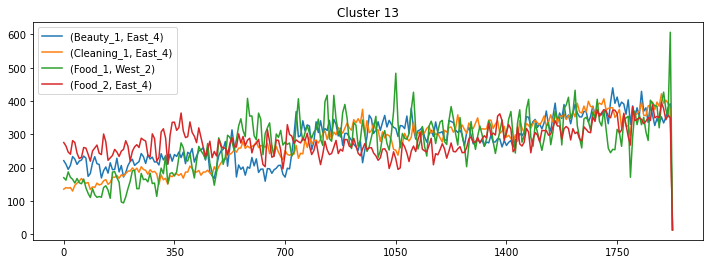

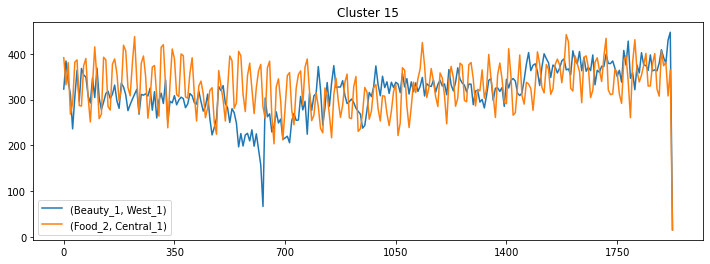

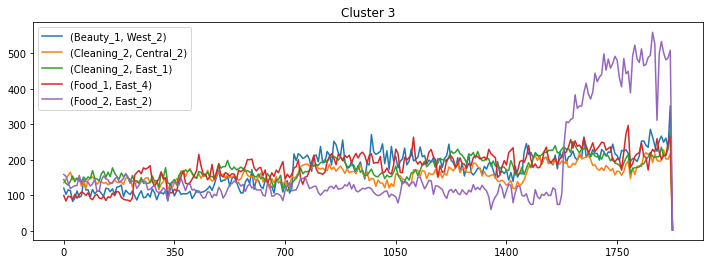

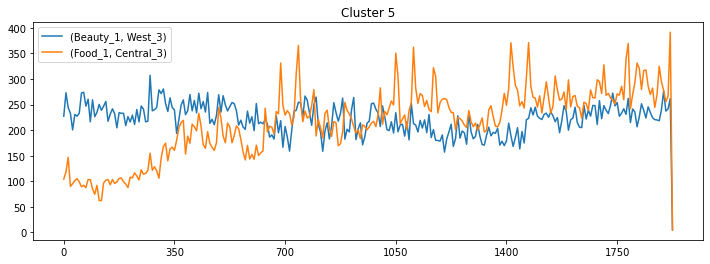

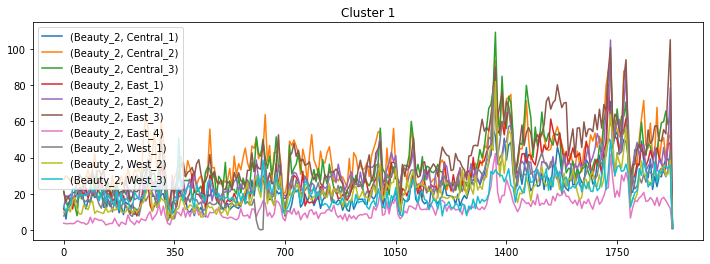

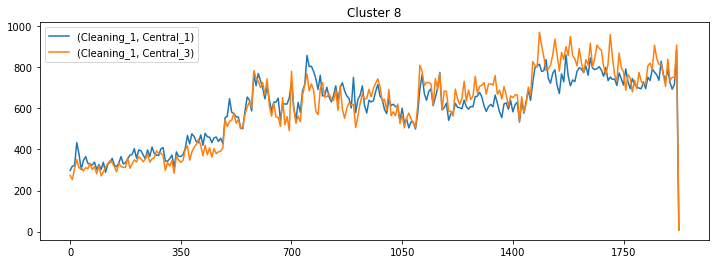

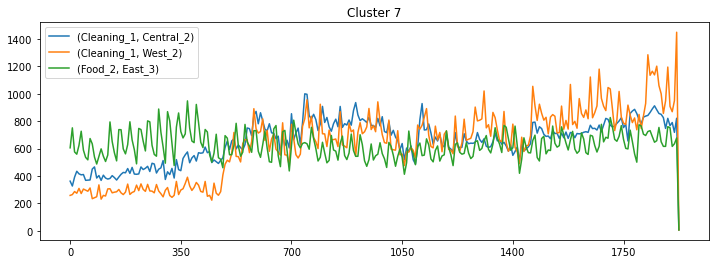

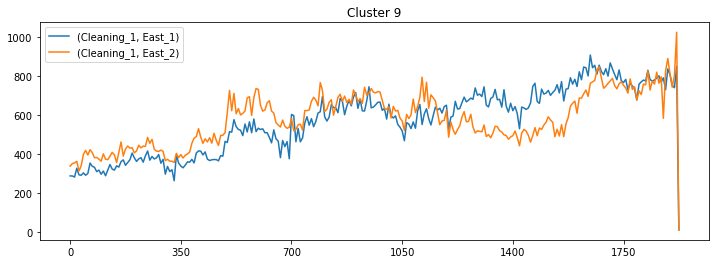

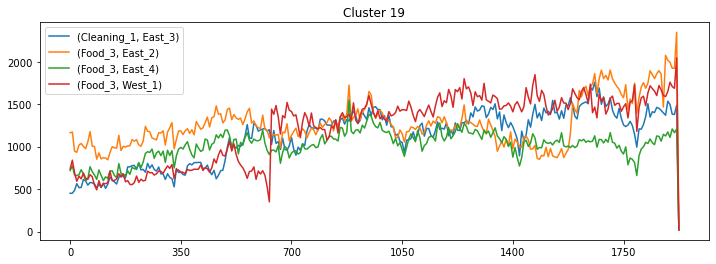

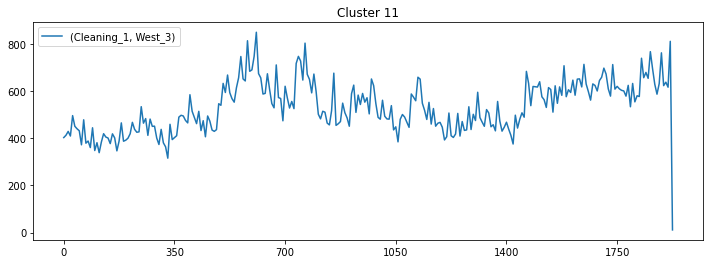

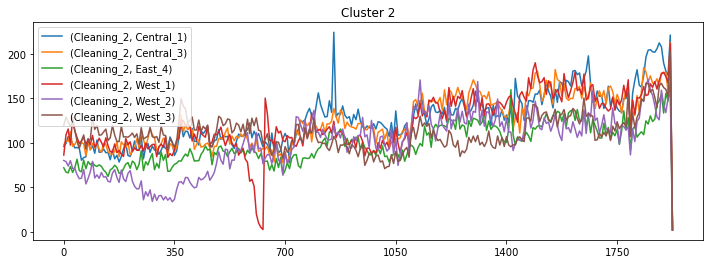

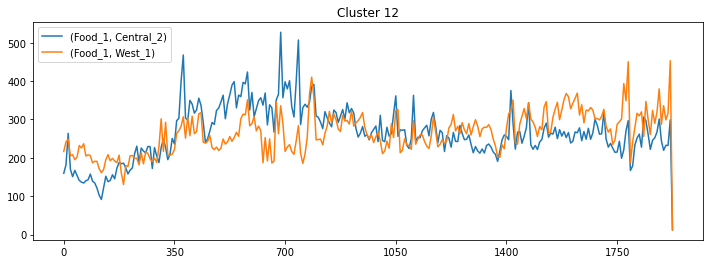

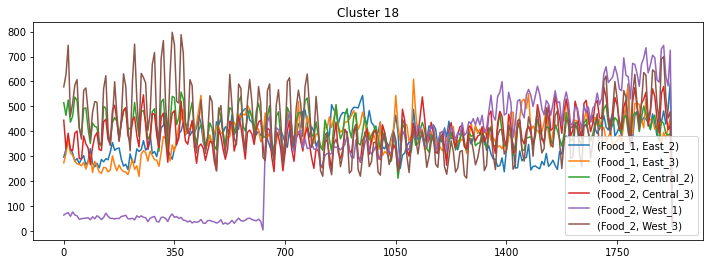

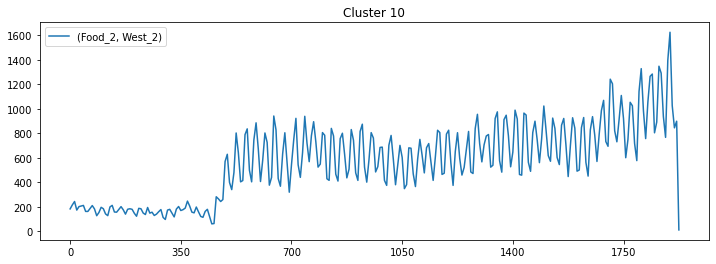

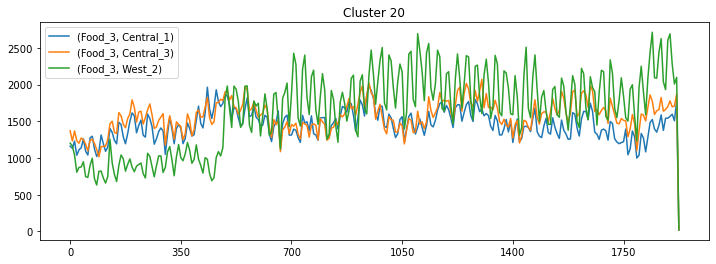

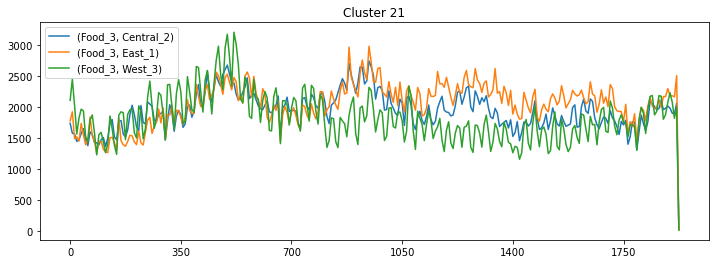

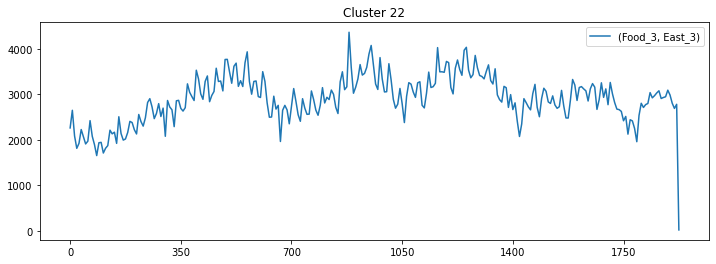

In [27]:
# plotting the clusters
unique_clusters = dtw_clusters["cluster"].unique()
for i in unique_clusters:
    subcat_store_weekly.T.merge(
        dtw_clusters.loc[dtw_clusters.cluster == i], 
        left_index = True,
        right_index = True
    )\
        .T\
        .plot(figsize = (12,4))
    plt.title("Cluster {0}".format(i))

### Preparing the Dataset

In [28]:
train.columns = train.columns.astype(str)

In [29]:
#melting the train df to have the days in a column
df_melt = pd.melt(train, id_vars = [i for i in train.columns if i.find("id") != -1],
                          value_vars = [i for i in train.columns if i.isnumeric()], var_name = 'd', value_name = 'sales')
df_melt.head()

,id,item_id,subcat_id,category_id,store_id,region_id,d,sales
0,Beauty_1_001_East_1,Beauty_1_001,Beauty_1,Beauty,East_1,East,1,0
1,Beauty_1_002_East_1,Beauty_1_002,Beauty_1,Beauty,East_1,East,1,0
2,Beauty_1_003_East_1,Beauty_1_003,Beauty_1,Beauty,East_1,East,1,0
3,Beauty_1_004_East_1,Beauty_1_004,Beauty_1,Beauty,East_1,East,1,0
4,Beauty_1_005_East_1,Beauty_1_005,Beauty_1,Beauty,East_1,East,1,0


In [30]:
#remove d_ in calendar
calendar['d'] = calendar['d'].str[2:]
#changing the date to the right data type
calendar['date'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d')

calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d
0,2011-01-29,11101,Saturday,1,1,2011,1
1,2011-01-30,11101,Sunday,2,1,2011,2
2,2011-01-31,11101,Monday,3,1,2011,3
3,2011-02-01,11101,Tuesday,4,2,2011,4
4,2011-02-02,11101,Wednesday,5,2,2011,5


In [31]:
#merge pivoted train with calendar
traincal = pd.merge(df_melt, calendar, on = 'd', how = 'left')

traincal.head()

,id,item_id,subcat_id,category_id,store_id,region_id,d,sales,date,wm_yr_wk,weekday,wday,month,year
0,Beauty_1_001_East_1,Beauty_1_001,Beauty_1,Beauty,East_1,East,1,0,2011-01-29,11101,Saturday,1,1,2011
1,Beauty_1_002_East_1,Beauty_1_002,Beauty_1,Beauty,East_1,East,1,0,2011-01-29,11101,Saturday,1,1,2011
2,Beauty_1_003_East_1,Beauty_1_003,Beauty_1,Beauty,East_1,East,1,0,2011-01-29,11101,Saturday,1,1,2011
3,Beauty_1_004_East_1,Beauty_1_004,Beauty_1,Beauty,East_1,East,1,0,2011-01-29,11101,Saturday,1,1,2011
4,Beauty_1_005_East_1,Beauty_1_005,Beauty_1,Beauty,East_1,East,1,0,2011-01-29,11101,Saturday,1,1,2011


In [32]:
#changing the date to the right data type
traincal['date'] = pd.to_datetime(traincal['date'], format='%Y-%m-%d')

In [33]:
traincal_temp = traincal[["id", "date", "sales"]]

traincal_temp = traincal_temp.set_index('date')

### Looking for seasonality, trend, and residual 

Identifying seasonality for id Food_2_326_East_2
Identifying seasonality for id Cleaning_2_155_East_4
Identifying seasonality for id Beauty_1_257_Central_2


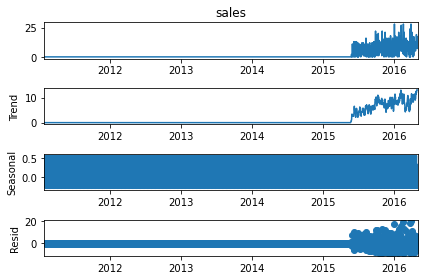

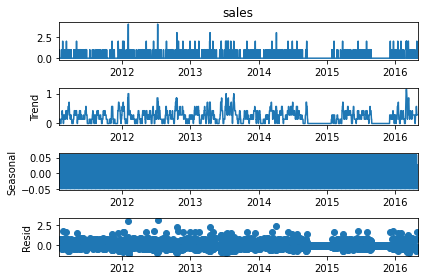

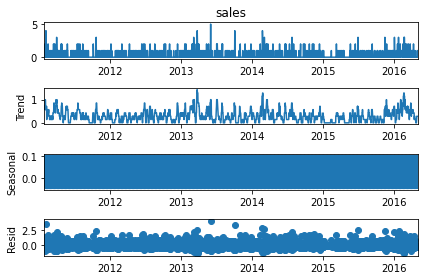

In [35]:
#plotting decomposition of 3 random ids
random_id = sample(list(train["id"].unique()), 3)
for i in range(len(random_id)):
    item = random_id[i]
    res = sm.tsa.seasonal_decompose(traincal_temp[traincal_temp['id'] == item]['sales'], model = "additive")
    res.plot()
    print("Identifying seasonality for id {0}".format(item))

Since we can't really see any seasonality based on decomposition above, we're going to look at lag plots, ACF, and PACF.

Plotting autocorrelation for id Food_2_164_West_3
Plotting autocorrelation for id Cleaning_2_494_West_1
Plotting autocorrelation for id Food_2_242_East_1


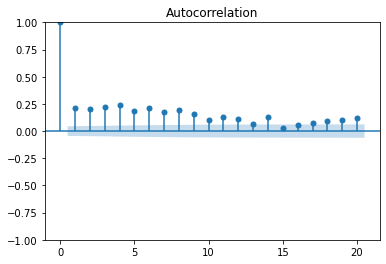

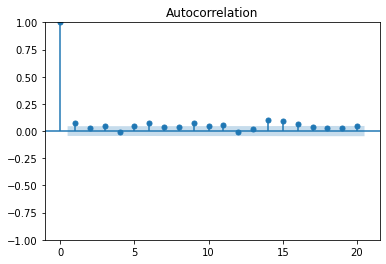

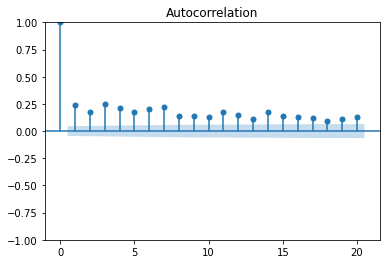

In [36]:
random_id = sample(list(train["id"].unique()), 3)

#plotting autocorrelation for random ids
for i in range(len(random_id)):
    test = traincal_temp[traincal_temp["id"] == random_id[i]]['sales']
    plot_acf(test, lags=20)
    print("Plotting autocorrelation for id {0}".format(random_id[i]))
    

/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Plotting partial autocorrelation for id Cleaning_1_397_Central_3
Plotting partial autocorrelation for id Food_1_204_East_3


/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Plotting partial autocorrelation for id Cleaning_2_010_Central_2


/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


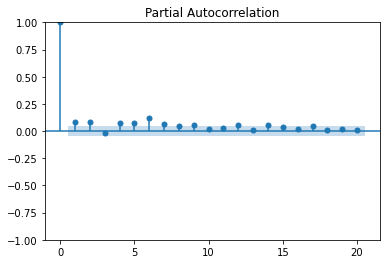

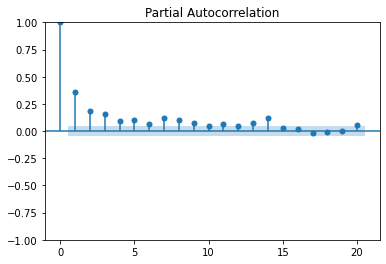

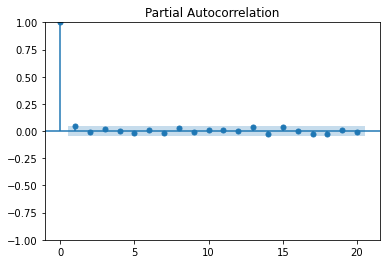

In [37]:
#plotting partial autocorrelation for random ids
random_id = sample(list(train["id"].unique()), 3)

for i in range(len(random_id)):
    test = traincal_temp[traincal_temp["id"] == random_id[i]]['sales']
    plot_pacf(test, lags=20)
    print("Plotting partial autocorrelation for id {0}".format(random_id[i]))

#not all partial autocorrelation plots show a strong relationship with a certain lag, so let's next plot the 
#autocorrelation and partial autocorrelation plots based on the different store ids and subcategory ids
#additionally, it's not feasible to plot the (partial) autocorrelation for all unique ids

In [38]:
#looking at seasonality by subcategories
subcat_sales_table = traincal[["subcat_id", "date", "sales"]]

subcat_sales_table = subcat_sales_table.groupby(["subcat_id", 'date']).sum()

subcat_ids = train["subcat_id"].unique()

Identifying seasonality for subcategory_id Beauty_1
Identifying seasonality for subcategory_id Beauty_2
Identifying seasonality for subcategory_id Cleaning_1
Identifying seasonality for subcategory_id Cleaning_2
Identifying seasonality for subcategory_id Food_1
Identifying seasonality for subcategory_id Food_2
Identifying seasonality for subcategory_id Food_3


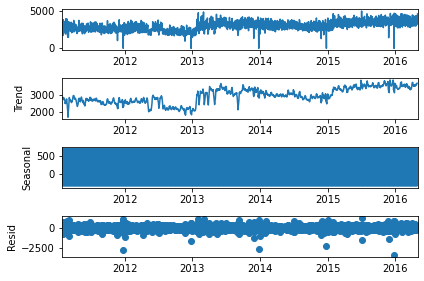

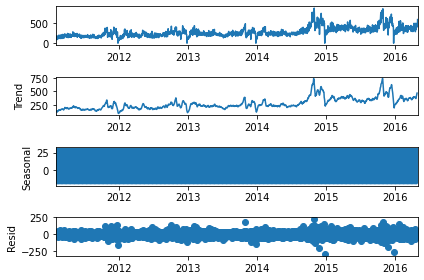

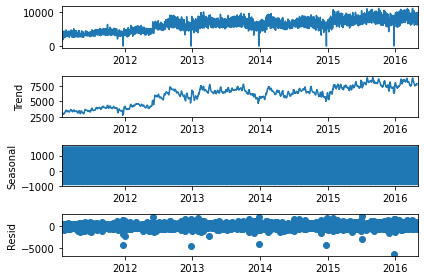

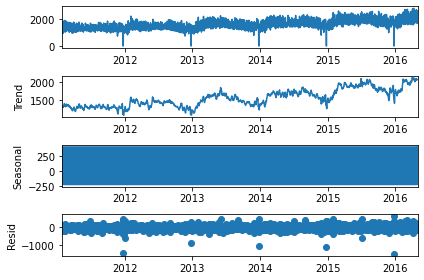

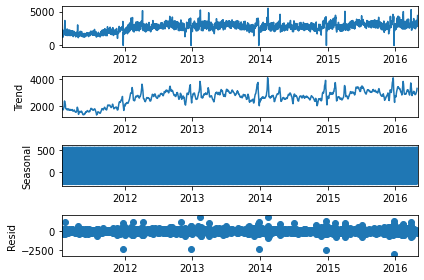

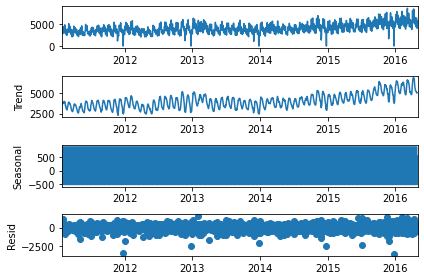

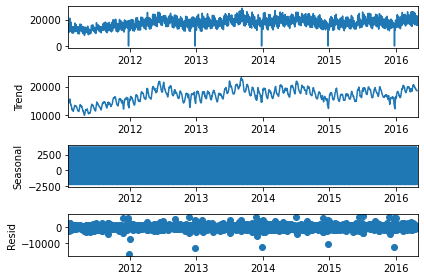

In [39]:
for i in range(len(subcat_ids)):
    subcat = subcat_ids[i]
    res = sm.tsa.seasonal_decompose(subcat_sales_table.loc[subcat], model = "additive")
    res.plot()
    print("Identifying seasonality for subcategory_id {0}".format(subcat))
       

In [40]:
#looking at seasonality by store_id
storeid_sales_table = traincal[["store_id", "date", "sales"]]

storeid_sales_table = storeid_sales_table.groupby(["store_id", 'date']).sum()

Identifying seasonality for store_id East_1
Identifying seasonality for store_id East_2
Identifying seasonality for store_id East_3
Identifying seasonality for store_id East_4
Identifying seasonality for store_id Central_1
Identifying seasonality for store_id Central_2
Identifying seasonality for store_id Central_3
Identifying seasonality for store_id West_1
Identifying seasonality for store_id West_2
Identifying seasonality for store_id West_3


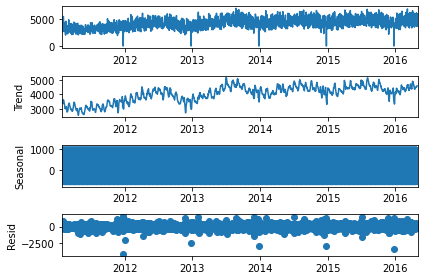

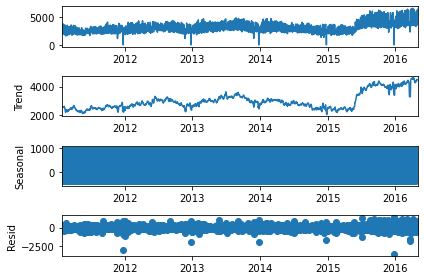

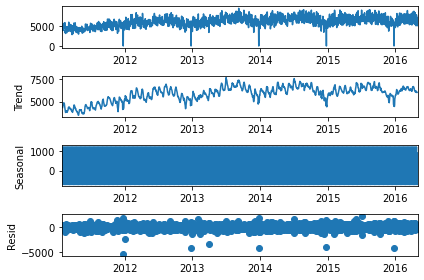

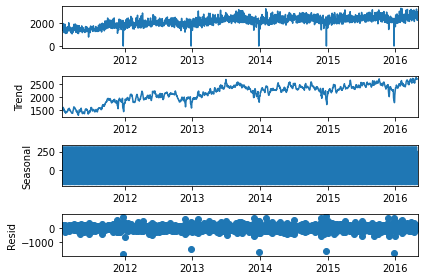

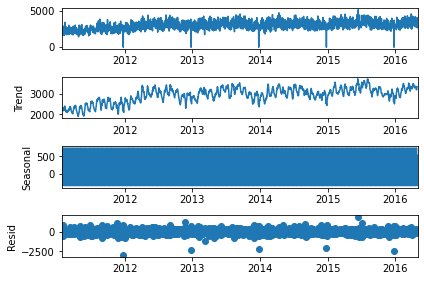

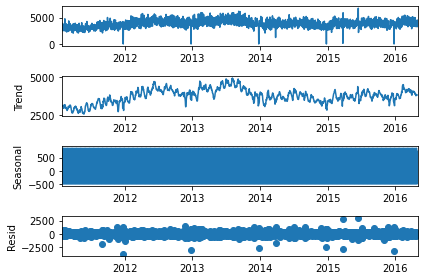

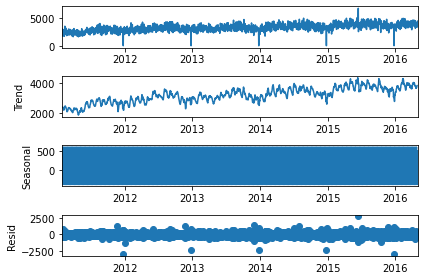

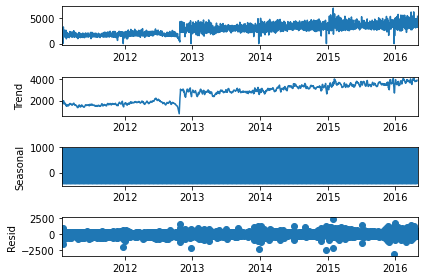

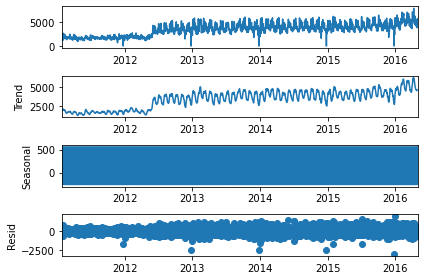

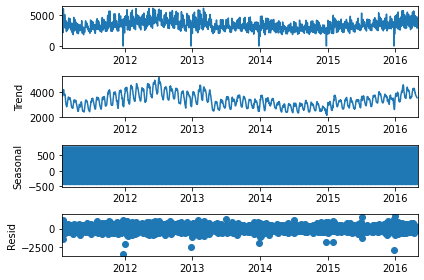

In [41]:
store_ids = train["store_id"].unique()

for i in range(len(store_ids)):
    store = store_ids[i]
    res = sm.tsa.seasonal_decompose(storeid_sales_table.loc[store], model = "additive")
    resplot = res.plot()
    print("Identifying seasonality for store_id {0}".format(store))

Plotting autocorrelation for id Beauty_1
Plotting autocorrelation for id Beauty_2
Plotting autocorrelation for id Cleaning_1
Plotting autocorrelation for id Cleaning_2
Plotting autocorrelation for id Food_1
Plotting autocorrelation for id Food_2
Plotting autocorrelation for id Food_3


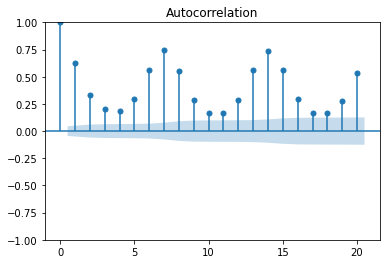

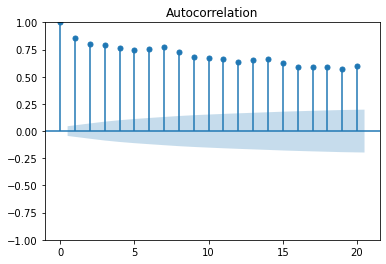

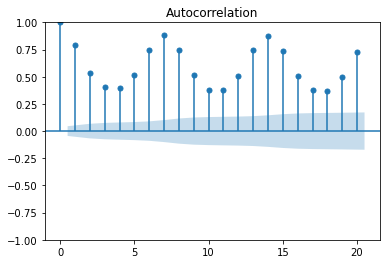

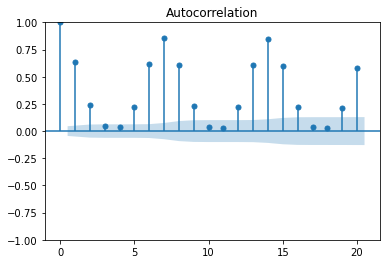

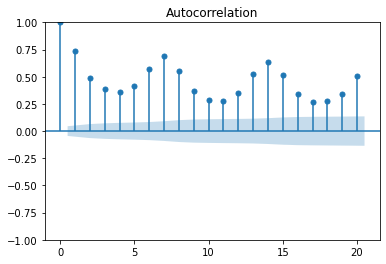

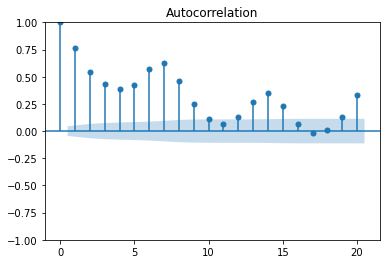

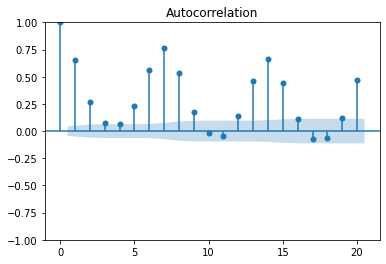

In [42]:
#plotting autocorrelation for the different subcategory ids
for i in range(len(subcat_ids)):
    subcat = subcat_ids[i]
    plot_acf(subcat_sales_table.loc[subcat], lags=20)
    print("Plotting autocorrelation for id {0}".format(subcat))

/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Plotting partial autocorrelation for id Beauty_1
Plotting partial autocorrelation for id Beauty_2
Plotting partial autocorrelation for id Cleaning_1
Plotting partial autocorrelation for id Cleaning_2


/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Use

Plotting partial autocorrelation for id Food_1
Plotting partial autocorrelation for id Food_2
Plotting partial autocorrelation for id Food_3


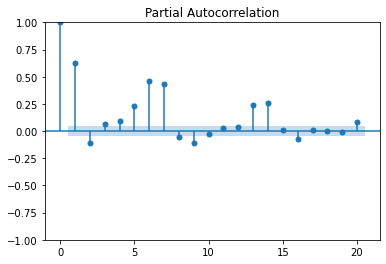

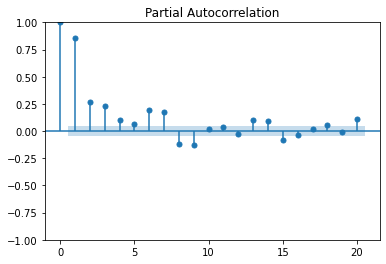

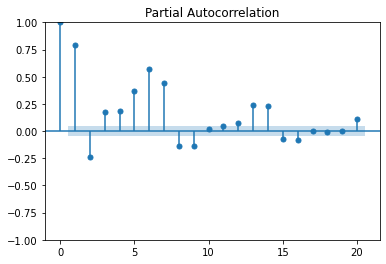

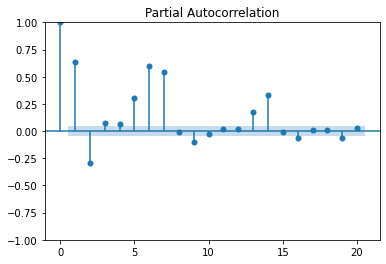

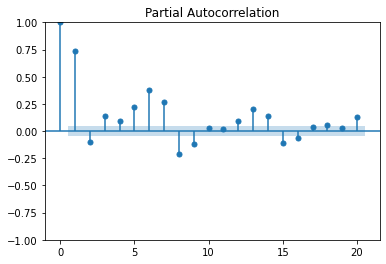

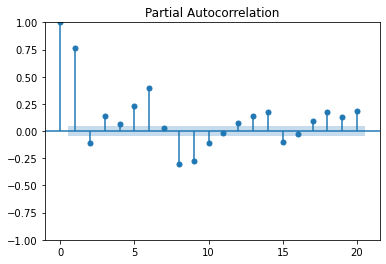

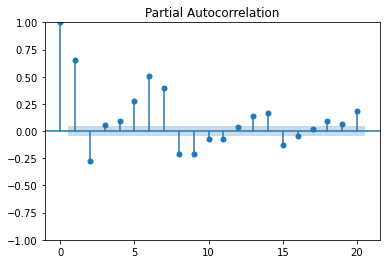

In [43]:
#plotting partialautocorrelation for the different subcategory ids
for i in range(len(subcat_ids)):
    subcat = subcat_ids[i]
    plot_pacf(subcat_sales_table.loc[subcat], lags=20)
    print("Plotting partial autocorrelation for id {0}".format(subcat))

Below, we play around with the lag value. After many trials, we noticed that there is a strong correlation when lag is a multiple of 7.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 749)'>

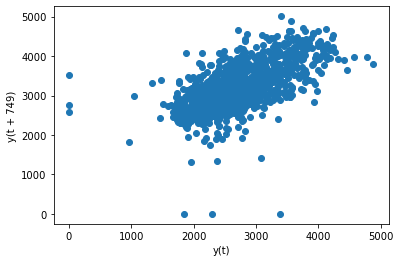

In [44]:
#noticed strong correlation with lag 1 and lag 7
#we plotted lag plots for all subcategories but didn't include all of them to keep the notebook more concise
pd.plotting.lag_plot(subcat_sales_table.loc['Beauty_1'], lag = 749)

Plotting autocorrelation for id East_1
Plotting autocorrelation for id East_2
Plotting autocorrelation for id East_3
Plotting autocorrelation for id East_4
Plotting autocorrelation for id Central_1
Plotting autocorrelation for id Central_2
Plotting autocorrelation for id Central_3
Plotting autocorrelation for id West_1
Plotting autocorrelation for id West_2
Plotting autocorrelation for id West_3


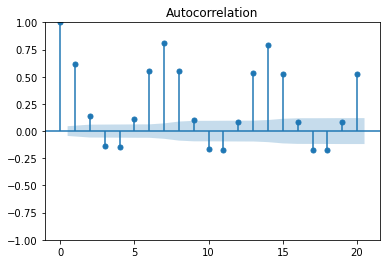

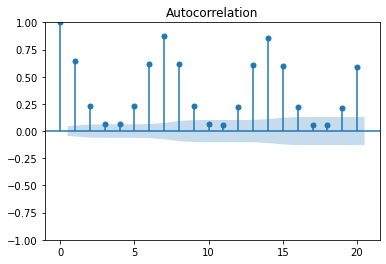

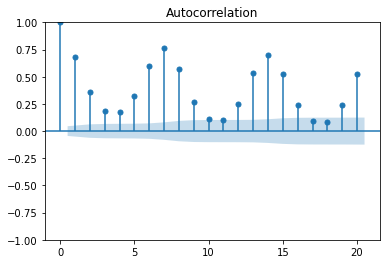

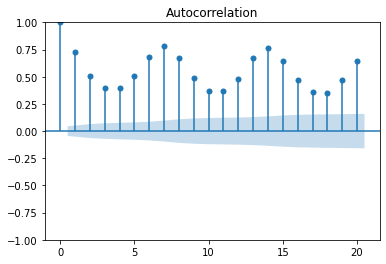

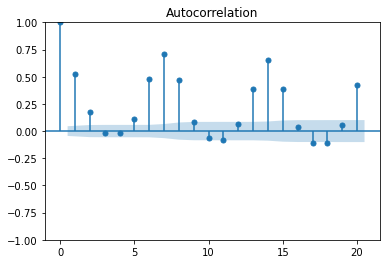

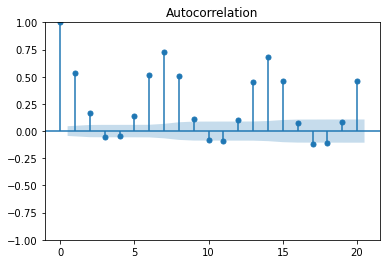

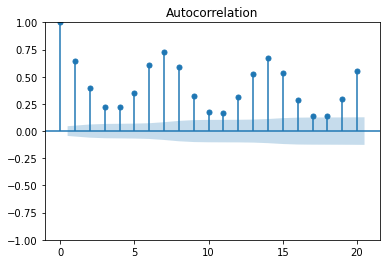

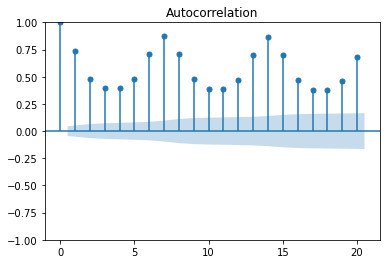

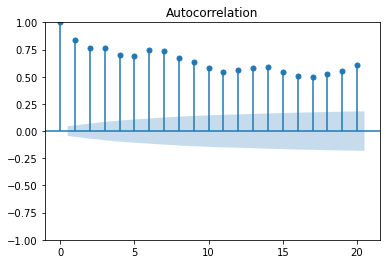

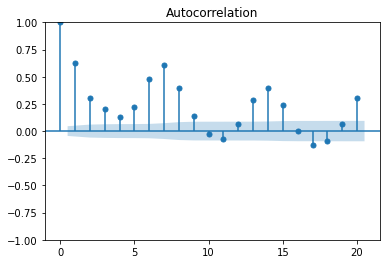

In [45]:
#plotting autocorrelation for the different store ids
for i in range(len(store_ids)):
    store = store_ids[i]
    plot_acf(storeid_sales_table.loc[store], lags=20)
    print("Plotting autocorrelation for id {0}".format(store))

/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/cathychoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Use

Plotting partial autocorrelation for id East_1
Plotting partial autocorrelation for id East_2
Plotting partial autocorrelation for id East_3
Plotting partial autocorrelation for id East_4
Plotting partial autocorrelation for id Central_1
Plotting partial autocorrelation for id Central_2
Plotting partial autocorrelation for id Central_3
Plotting partial autocorrelation for id West_1
Plotting partial autocorrelation for id West_2
Plotting partial autocorrelation for id West_3


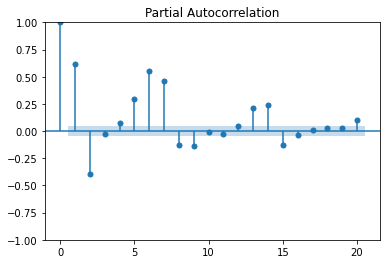

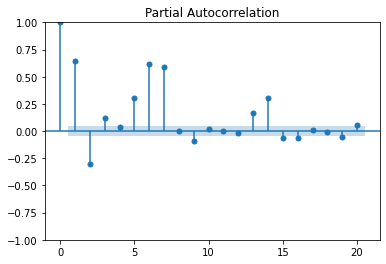

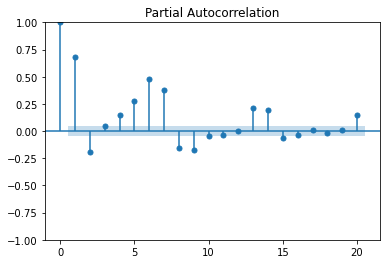

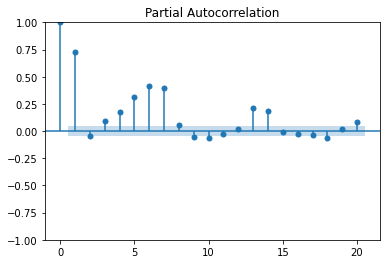

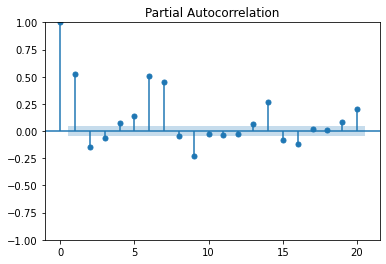

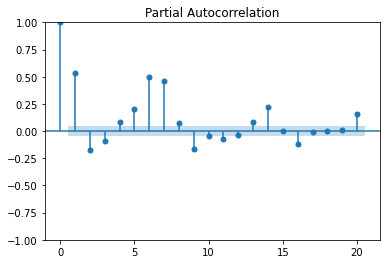

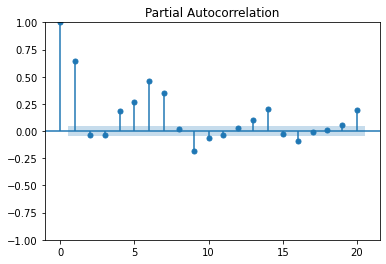

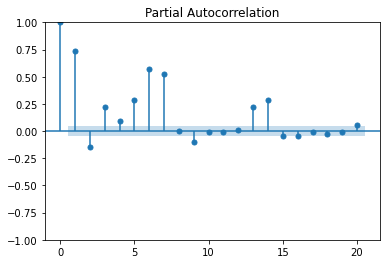

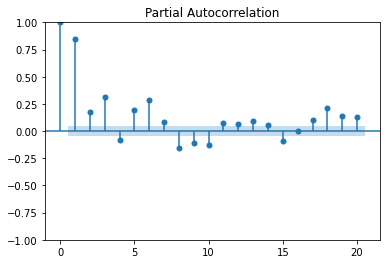

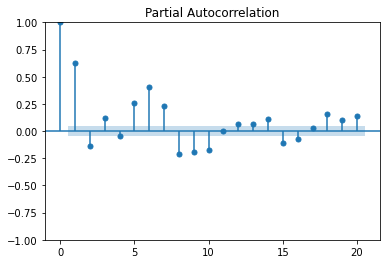

In [46]:
#plotting partialautocorrelation for the different store ids

store_ids = train["store_id"].unique()

for i in range(len(store_ids)):
    store = store_ids[i]
    plot_pacf(storeid_sales_table.loc[store], lags=20)
    print("Plotting partial autocorrelation for id {0}".format(store))

Again, we play around with the lag value. Similarly, we noticed that there is a strong correlation when lag = 700, 1400 - mainly when we lag every 7 days.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 700)'>

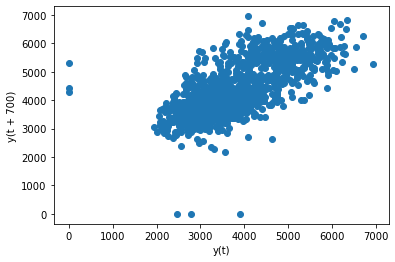

In [47]:
#noticed strong correlation with lag 1 and lag 7
#we plotted lag plots for all store_ids but didn't include all of them to keep the notebook more concise
pd.plotting.lag_plot(storeid_sales_table.loc['East_1'], lag = 700)

Based on the ACF and PACF plots, we should do lags to be 1 and 7, and seasonality seems to be 7. We also need first order differencing.